# (1) 데이터 가져오기

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
path = '/aiffel/data/data/bike-sharing-demand/'

In [4]:
os.listdir(Path(path))

['train.csv', 'test.csv', 'sampleSubmission.csv']

In [5]:
data = pd.read_csv(path+ '/train.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [6]:
data['datetime'] = pd.to_datetime(data['datetime']) #  to_datatime() converts it into datetime

In [7]:
usefulMethods = [i for i in dir(data['datetime'][0]) if '__' not in i and i[0] != '_']

In [8]:
print(usefulMethods) # there are year, month, day, etc. methods ready to use for useful extraction

['asm8', 'astimezone', 'ceil', 'combine', 'ctime', 'date', 'day', 'day_name', 'day_of_week', 'day_of_year', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'dst', 'floor', 'fold', 'freq', 'freqstr', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'month_name', 'nanosecond', 'normalize', 'now', 'quarter', 'replace', 'resolution', 'round', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'to_datetime64', 'to_julian_date', 'to_numpy', 'to_period', 'to_pydatetime', 'today', 'toordinal', 'tz', 'tz_convert', 'tz_localize', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'value', 'week', 'weekday', 'weekofyear', 'year']


In [9]:
data['datetime'] = pd.to_datetime(data['datetime']) 
# use apply to make new columns
data['year'] = data['datetime'].apply(lambda x: x.year) 
data['month'] = data['datetime'].apply(lambda x: x.month)
data['day'] = data['datetime'].apply(lambda x: x.day)
data['hour'] = data['datetime'].apply(lambda x: x.hour)
data['minute'] = data['datetime'].apply(lambda x: x.minute)
data['second'] = data['datetime'].apply(lambda x: x.second)

data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


> We choose the following features because of the reaasonse

1. Correlation heat plot 
- We have used it in order to gain insight to this data 
- temp (or atemp) have moderate positive correlation with the count

<AxesSubplot:>

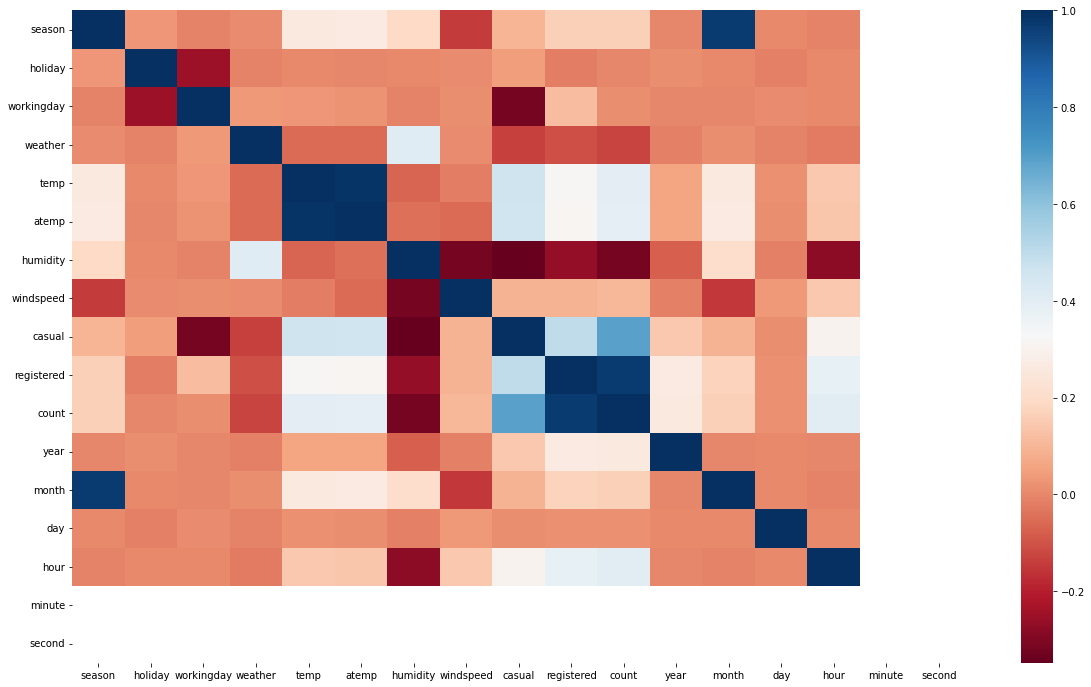

In [10]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), cmap=plt.cm.RdBu)

In [11]:
data['weather'].value_counts() # weather category : integer. [1-4]

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [12]:
data.groupby(['year'])['count'].mean() # Yearly count average

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

In [13]:
plot_list = ['year', 'month', 'day', 'hour', 'minute', 'second'] # Average count upon time

for a in plot_list:
    print(data.groupby([a])['count'].mean())

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64
month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64
day
1     180.333913
2     183.910995
3     194.696335
4     195.705575
5     189.765217
6     189.860140
7     183.773519
8     179.041812
9     187.897391
10    195.183566
11    195.679577
12    190.675393
13    194.160279
14    195.829268
15    201.527875
16    191.353659
17    205.660870
18    192.605684
19    192.311847
Name: count, dtype: float64
hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    31

# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

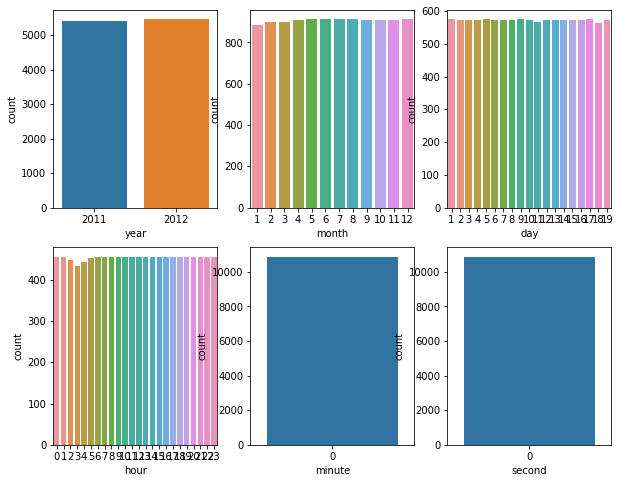

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

axes = axes.flatten()

plot_list = ['year', 'month', 'day', 'hour', 'minute', 'second']

for i in range(len(axes)):
    sns.countplot(data=data, x=plot_list[i], ax=axes[i])

# (4) X, y 컬럼 선택 및 train/test 데이터 분리

> `Season` has been selected because it's pretty logical that we bike in mild seasons. <br> 
`Working day` has been added so we can take "communting to work/home" and "holday ride" into account. <br>
`Weather`. We usually don't bike in harsh rainy season. `temp`, `humidity`, `windspeed` also. <br>
We can know the relationshp by using heatmap and also taking average <br> 
`month`, `hour` : We know because we have taken the average and also made a graph

In [15]:
features = ['season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed' ,'month', 'hour']

In [16]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [17]:
X = data[features]
y = data['count']

In [18]:
from sklearn.model_selection import train_test_split

tr_X, ts_X, tr_y, ts_y = train_test_split(X, y, test_size=0.25)

# (5) LinearRegression 모델 학습

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr_model = LinearRegression()
lr_model.fit(tr_X, tr_y)

LinearRegression()

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [21]:
pred = lr_model.predict(ts_X)

In [22]:
import numpy as np

def MSE(y, y_pred):
    mse = ((y - y_pred) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def RMSE(y, y_pred):
    rmse = np.sqrt(((y - y_pred) ** 2).mean())  # 두 값의 차이의 제곱의 평균
    return rmse

In [23]:
mse = MSE(ts_y, pred)
rmse = RMSE(ts_y, pred)

print(f"MSE : {mse:.3f} / RMSE : {rmse:.3f}")

MSE : 21371.123 / RMSE : 146.189


- MSE: 21371.123 / RMSE: 146.189 
    - Linear regression model metric / loss 

# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [24]:
ts_X

,season,workingday,weather,temp,humidity,windspeed,month,hour
8725,3,0,1,29.52,79,6.0032,8,22
6904,2,1,1,16.40,43,0.0000,4,0
7499,2,1,1,25.42,25,8.9981,5,20
9206,3,1,1,26.24,89,11.0014,9,23
7746,2,0,1,21.32,63,7.0015,6,3
...,...,...,...,...,...,...,...,...
1304,1,0,1,21.32,34,27.9993,3,5
8232,3,0,1,31.16,52,0.0000,7,9
6771,1,1,1,21.32,72,8.9981,3,10
4212,4,1,1,24.60,46,0.0000,10,13


In [25]:
ts_X.shape, pred.shape

((2722, 8), (2722,))

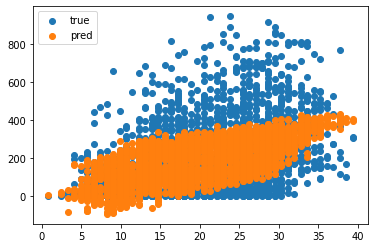

In [26]:
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(ts_X['temp'], ts_y, label='true')
plt.scatter(ts_X['temp'], pred, label='pred')
plt.legend()

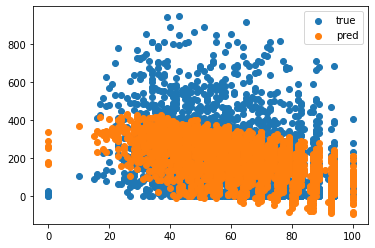

In [27]:
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(ts_X['humidity'], ts_y, label='true')
plt.scatter(ts_X['humidity'], pred, label='pred')
plt.legend()

In [28]:
!pip install session-info

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 KB 4.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=bfa08f103ba96c6f3e1de33871429e54dc30f71f8f248f4be001270f086501c8
  Stored in directory: /aiffel/.cache/pip/wheels/d4/fc/2e/00ca60bac7954b84907efd41baa9b4853500eaeec4228410c6
Successfully built session-info


> To list loaded packages

In [29]:
import session_info
session_info.show()